| <p style="text-align: left;">Name</p>               | <p style="text-align: right;">Date</p> |
| ---------------------------------------------------| ------------------------------------- |
| <p style="text-align: left">Diaaeldin SHALABY</p>   | 07.052021                            |

<h1 style="color:rgb(0,120,170)">Hands-on AI II</h1>
<h2 style="color:rgb(0,120,170)">Unit 2 &mdash; The Vanishing Gradient Problem (Assignment)</h2>

<b>Authors:</b> S. Lehner, J. Brandstetter, B. Schäfl<br>
<b>Date:</b> 16-04-2021

This file is part of the "Hands-on AI II" lecture material. The following copyright statement applies to all code within this file.

<b>Copyright statement:</b><br>
This  material,  no  matter  whether  in  printed  or  electronic  form,  may  be  used  for personal  and non-commercial educational use only.  Any reproduction of this manuscript, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h2>Table of contents</h2>
<ol>
    <a href="#exercise-defining-auxiliary"><li style="font-size:large;font-weight:bold">Definition of Auxiliaries</li></a>
    <ol style="margin-bottom:15px">
        <a href="#exercise-defining-auxiliary-one"><li style="font-size:medium">Loading and visualizing</li></a>
        <a href="#exercise-defining-auxiliary-two"><li style="font-size:medium">Downprojecting and interpreting</li></a>
        <a href="#exercise-defining-auxiliary-three"><li style="font-size:medium">Loading and preparing</li></a>
    </ol>
    <a href="#exercise-training-neural-network"><li style="font-size:large;font-weight:bold">Training of a Neural Network</li></a>
    <ol style="margin-bottom:15px">
        <a href="#exercise-training-neural-network-one"><li style="font-size:medium">Constructing an FNN</li></a>
        <a href="#exercise-training-neural-network-two"><li style="font-size:medium">Forward pass</li></a>
                <a href="#exercise-training-neural-network-three"><li style="font-size:medium">Backward pass</li></a>
    </ol>
    <a href="#exercise-analyze-gradient"><li style="font-size:large;font-weight:bold">Analyzing Gradients</li></a>
    <ol style="margin-bottom:15px">
        <a href="#exercise-analyze-gradient-one"><li style="font-size:medium">Collecting and visualizing</li>
        </a>
        <a href="#exercise-analyze-gradient-two"><li style="font-size:medium">Countermeasure and re-train</li></a>
        <a href="#exercise-analyze-gradient-three"><li style="font-size:medium">Comparing gradients</li></a>
    </ol>
    <a href="#exercise-derive-derivatives"><li style="font-size:large;font-weight:bold">Deriving Derivatives</li></a>
    <ol style="margin-bottom:15px">
        <a href="#exercise-derive-derivatives-one"><li style="font-size:medium">Case <tt>hardsigmoid</tt></li>
        </a>
        <a href="#exercise-derive-derivatives-two"><li style="font-size:medium">Case <tt>leaky_relu</tt></li></a>
    </ol>
</ol>

<h3 style="color:rgb(0,120,170)">How to use this notebook</h3>
This notebook is designed to run from start to finish. There are different tasks (displayed in <span style="color:rgb(248,138,36)">orange boxes</span>) which require your contribution (in form of code, plain text, ...). Most/All of the supplied functions are imported from the file <code>u2_utils.py</code> which can be seen and treated as a black box. However, for further understanding, you can look at the implementations of the helper functions. In order to run this notebook, the packages which are imported at the beginning of <code>u2_utils.py</code> need to be installed.

In [1]:
# Import pre-defined utilities specific to this notebook.
import u2_utils as u2

# Import additional utilities needed in this notebook.
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch

from typing import Dict, Sequence

# Setup Jupyter notebook (warning: this may affect all Jupyter notebooks running on the same Jupyter server).
u2.setup_jupyter()

<h3 style="color:rgb(0,120,170)">Module versions</h3>
As mentioned in the introductiory slides, specific minimum versions of Python itself as well as of used modules is recommended.

In [2]:
u2.check_module_versions()

Installed Python version: 3.8 (✓)
Installed numpy version: 1.19.1 (✓)
Installed pandas version: 1.1.3 (✓)
Installed PyTorch version: 1.7.1 (✓)
Installed scikit-learn version: 0.23.2 (✓)
Installed scipy version: 1.5.0 (✓)
Installed matplotlib version: 3.3.1 (✓)
Installed seaborn version: 0.11.0 (✓)
Installed PIL version: 8.0.0 (✓)


<a name="exercise-defining-auxiliary"></a><h2>Definition of Auxiliaries</h2>
<p>In this exercise you will be working with a data set composed of images of various handwritten digits. It is probably <i>the</i> most prominent data set in the domain of machine learning: the <i>MNIST</i> data set. The data set distinguishes <i>ten</i> different classes, one for each digit (<i>zero</i> to <i>nine</i>). For curious minds, more information regarding this data set can be found at:

<center>
    <cite>LeCun, Y., 1998. The MNIST database of handwritten digits. <a href="http://yann.lecun.com/exdb/mnist/">http://yann.lecun.com/exdb/mnist/</a>.</cite>
</center>
    
Before analyzing and tackling the vanishing gradient problem, the data sets needs to be inspected.</p>

<a name="exercise-defining-auxiliary-one"></a><div class="alert alert-warning">
    Execute the notebook until here and try to solve the following tasks:
    <ul>
        <li>Load the <i>MNIST</i> data set using the appropriate function as supplied by us.</li>
        <li>Divide the data set between the training set and the test set in a ratio of $7:1$.</li>
        <li>Visualize the MNIST training set in tabular form. What is the size of both subsets with respect to sample and feature counts?</li>
    </ul>
</div>

In [3]:
data_mnist = u2.load_mnist()
data_mnist

,PX_0,PX_1,PX_2,PX_3,PX_4,PX_5,PX_6,PX_7,PX_8,PX_9,...,PX_775,PX_776,PX_777,PX_778,PX_779,PX_780,PX_781,PX_782,PX_783,digit
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [4]:
# Set default plotting style and random seed for reproducibility.
sns.set()
np.random.seed(seed=42)

# Split the Fashion-MNIST data set into training as well as test set and print their respective size.
data_mnist_train, data_mnist_test = u2.split_data(data_mnist, test_size=1.0 / 8.0)
print(f'{"Full data set is of size:":>27} {data_mnist.shape[0]:>5}')
print(f'Training subset is of size: {data_mnist_train.shape[0]:>5}')
print(f'{"Testing subset is of size:":>27} {data_mnist_test.shape[0]:>5}')

  Full data set is of size: 70000
Training subset is of size: 61250
 Testing subset is of size:  8750


<a name="exercise-defining-auxiliary-two"></a><div class="alert alert-warning">
    Execute the notebook until here and try to solve the following tasks:
    <ul>
        <li>Reduce the dimensionality of the MNIST training set using <i>PCA</i> and visualize the downprojection.</li>
        <li>Comment on the separability of the MNIST training set with respect to the downprojection.</li>
    </ul>
</div>

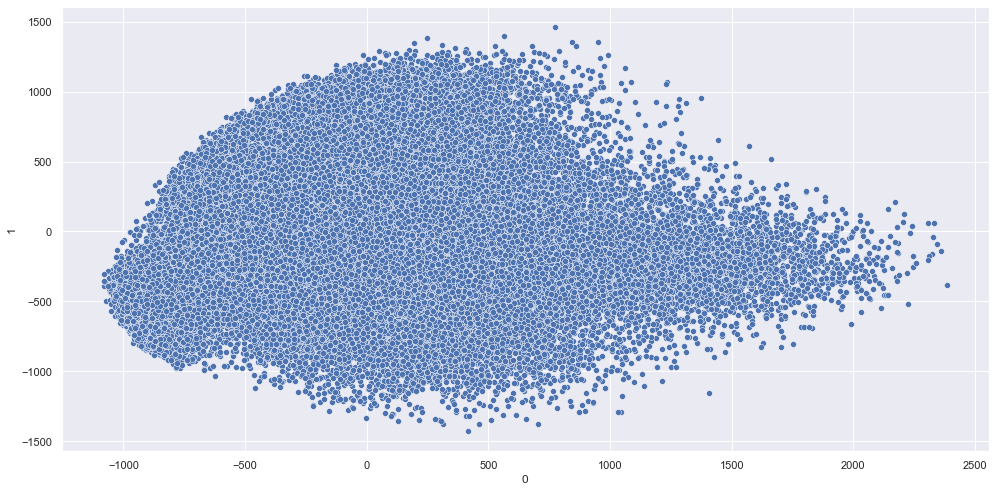

In [5]:
# Set default plotting style and random seed for reproducibility.
sns.set()
np.random.seed(seed=42)

data_mnist_pca = u2.apply_pca(data=data_mnist,n_components=2)
u2.plot_points_2d(data=data_mnist_pca, figsize=(14, 7))

<a name="exercise-defining-auxiliary-three"></a><div class="alert alert-warning">
    Execute the notebook until here and try to solve the following tasks:
    <ul>
        <li>Create a corresponding <tt>TensorDataset</tt> for the training as well as the test set.</li>
        <li>Wrap the previously defined <tt>TensorDataset</tt> instances in separate <tt>DataLoader</tt> instances with a batch size of $64$ (shuffle the training data set).</li>
        <li>Scale the features of the training as well as test set by a factor of $1\,/\,255$.</li>
    </ul>
</div>

In [6]:
# Set random seed for reproducibility.
np.random.seed(seed=42)
torch.manual_seed(seed=42)

# Create data loader for iterating the Fashion-MNIST training data set.
loader_mnist_train = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(
    torch.from_numpy(data_mnist_train.drop(columns=[r'digit']).values.astype(
        dtype=np.float32) / 255.0).unsqueeze(1).reshape(len(data_mnist_train), 28 * 28),
    torch.from_numpy(data_mnist_train[r'digit'].values.astype(dtype=np.long))
), batch_size=64, shuffle=True, drop_last=False)

# Create data loader for iterating the Fashion-MNIST test data set.
loader_mnist_test = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(
    torch.from_numpy(data_mnist_test.drop(columns=[r'digit']).values.astype(
        dtype=np.float32) / 255.0).unsqueeze(1).reshape(len(data_mnist_test), 28 * 28),
    torch.from_numpy(data_mnist_test[r'digit'].values.astype(dtype=np.long))
), batch_size=64, shuffle=False, drop_last=False)

<div class="alert alert-warning">
    The following code snippet is taken from the accompanying exercise notebook. You do not need to modify it for this assignment.
</div>

In [7]:
def train_and_evaluate(model: torch.nn.Module, optimizer: torch.optim.Optimizer,
                       device: torch.device, num_epochs: int,
                       loader_train: torch.utils.data.DataLoader,
                       loader_test: torch.utils.data.DataLoader) -> None:
    """
    Auxiliary function for training and evaluating a corresponding model.
    
    :param model: model instance to train and evaluate
    :param optimizer: optimizer to use for model training
    :param device: device to use for model training and evaluation
    :param num_epochs: amount of epochs for model training
    :param loader_train: data loader supplying the training samples
    :param loader_test: data loader supplying the test samples
    :return: None
    """
    for epoch in range(num_epochs):

        # Train model instance for one epoch.
        u2.train_network(
            model=model, data_loader=loader_train, device=device, optimizer=optimizer)

        # Evaluate current model instance.
        performance = u2.test_network(
            model=model, data_loader=loader_train, device=device)

        # Print result of current epoch to standard out.
        print(f'Epoch: {str(epoch + 1).zfill(len(str(num_epochs)))} ' +
              f'/ Loss: {performance[0]:.4f} / Accuracy: {performance[1]:.4f}')

    # Evaluate final model on test data set.
    performance = u2.test_network(model=model, data_loader=loader_test, device=device)
    print(f'\nFinal loss: {performance[0]:.4f} / Final accuracy: {performance[1]:.4f}')

<a name="exercise-training-neural-network"></a><h2>Training of a Neural Network</h2>
<p>Loading and inspecting a new data set is always an exciting moment, but even more exciting is the implementation of a corresponding neural network and applying it to said data set. Hence, in this section you will have to implement and train an appropriate neural network model and revisit your knowledge about the <i>forward</i> as well as the <i>backward</i> pass.</p>

<a name="exercise-training-neural-network-one"></a><div class="alert alert-warning">
    Execute the notebook until here and try to solve the following tasks:
    <ul>
        <li>Implement a class <tt>FNN_0</tt> with the following architecture:</li>
    </ul>
    <table style="text-align:center;vertical-align:middle">
        <th>Position</th>
        <th>Element</th>
        <th>Comment</th>
        <tr>
            <td>0</td>
            <td>input</td>
            <td>-</td>
        </tr>
        <tr>
            <td>1</td>
            <td>fully connected</td>
            <td>square weight matrix</td>
        </tr>
        <tr>
            <td>2</td>
            <td>sigmoid</td>
            <td>-</td>
        </tr>
        <tr>
            <td>2</td>
            <td>fully connected</td>
            <td>square weight matrix</td>
        </tr>
        <tr>
            <td>3</td>
            <td>sigmoid</td>
            <td>-</td>
        </tr>
        <tr>
            <td>4</td>
            <td>fully connected</td>
            <td>square weight matrix</td>
        </tr>
        <tr>
            <td>5</td>
            <td>sigmoid</td>
            <td>-</td>
        </tr>
        <tr>
            <td>6</td>
            <td>fully connected</td>
            <td>square weight matrix</td>
        </tr>
        <tr>
            <td>7</td>
            <td>sigmoid</td>
            <td>-</td>
        </tr>
        <tr>
            <td>8</td>
            <td>fully connected</td>
            <td>square weight matrix</td>
        </tr>
        <tr>
            <td>9</td>
            <td>sigmoid</td>
            <td>-</td>
        </tr>
        <tr>
            <td>10</td>
            <td>fully connected</td>
            <td>$10$ output features</td>
        </tr>
        <tr>
            <td>11</td>
            <td>output</td>
            <td>-</td>
        </tr>
    </table>
    <ul>
        <li>Create an instance of <tt>FNN_0</tt> as well as of a corresponding <tt>Adam</tt> optimizer with a learning rate of $0.0001$.</li>
        <li>Print the resulting model and verify the architecture by inspecting the output.</li>
        <li>Train an <tt>FNN_0</tt> network for $5$ epochs, print the training accuracy as well as the loss per epoch and report the final test set loss and accuracy.</li>
    </ul>
</div>

In [8]:
class FNN_0 (torch.nn.Module):
    
    def __init__(self):
        super(FNN_0, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, 28 * 28)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(self.fc1.out_features, self.fc1.out_features)
        self.ac2 = torch.nn.Sigmoid()
        self.fc3 = torch.nn.Linear(self.fc2.out_features, self.fc2.out_features)
        self.ac3 = torch.nn.Sigmoid()
        self.fc4 = torch.nn.Linear(self.fc3.out_features, self.fc3.out_features)
        self.ac4 = torch.nn.Sigmoid()
        self.fc5 = torch.nn.Linear(self.fc4.out_features, self.fc4.out_features)
        self.ac5 = torch.nn.Sigmoid()
        
        self.fc6 = torch.nn.Linear(self.fc5.out_features, 10)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        x = self.ac2(x)
        x = self.fc3(x)
        x = self.ac3(x)
        x = self.fc4(x)
        x = self.ac4(x)
        x = self.fc5(x)
        x = self.ac5(x)
        return self.fc6(x)

In [9]:
# Set random seed for reproducibility.
np.random.seed(seed=42)
torch.manual_seed(seed=42)

# Create FNN_0 instance and the corresponding optimizer to use.
target_device = torch.device(r'cpu')
fnn_model = FNN_0().to(target_device)
optimizer = torch.optim.Adam(fnn_model.parameters(), lr=1e-4)

# Show the architecture of the FNN_0 model.
print(fnn_model)

FNN_0(
  (fc1): Linear(in_features=784, out_features=784, bias=True)
  (ac1): Sigmoid()
  (fc2): Linear(in_features=784, out_features=784, bias=True)
  (ac2): Sigmoid()
  (fc3): Linear(in_features=784, out_features=784, bias=True)
  (ac3): Sigmoid()
  (fc4): Linear(in_features=784, out_features=784, bias=True)
  (ac4): Sigmoid()
  (fc5): Linear(in_features=784, out_features=784, bias=True)
  (ac5): Sigmoid()
  (fc6): Linear(in_features=784, out_features=10, bias=True)
)


In [10]:
# Set random seed for reproducibility.
np.random.seed(seed=42)
torch.manual_seed(seed=42)

# Train and evaluate FNN_0 instance on the MNIST training set.
train_and_evaluate(
    model=fnn_model,
    optimizer=optimizer,
    device=target_device,
    num_epochs=5,
    loader_train=loader_mnist_train,
    loader_test=loader_mnist_test)

Epoch: 1 / Loss: 0.0149 / Accuracy: 0.6675
Epoch: 2 / Loss: 0.0089 / Accuracy: 0.8292
Epoch: 3 / Loss: 0.0067 / Accuracy: 0.8728
Epoch: 4 / Loss: 0.0056 / Accuracy: 0.8949
Epoch: 5 / Loss: 0.0053 / Accuracy: 0.8997

Final loss: 0.0055 / Final accuracy: 0.8951


<a name="exercise-training-neural-network-two"></a><div class="alert alert-warning">
    Execute the notebook until here and try to solve the following tasks:
    <ul>
                <li>Write down a formula for the corresponding <i>forward</i> pass of <tt>FNN_0</tt>. Use the same notation as presented during the exercise.</li>
    </ul>
</div>

<center>
    \begin{equation}
        \hat{y} = f\left(h_6(h_5(h_4(h_3(h_2(h_1(\mathbf{x};\mathbf{W}_1);\mathbf{W}_2);\mathbf{W}_3);\mathbf{W}_4);\mathbf{W}_5);\mathbf{W}_6 \right )
    \end{equation}
</center>


<a name="exercise-training-neural-network-three"></a><div class="alert alert-warning">
    Execute the notebook until here and try to solve the following tasks:
    <ul>
        <li>Write down a formula for the corresponding <i>backward</i> pass of <tt>FNN_0</tt>. Use the same notation as presented during the exercise.</li>
    </ul>
</div>

<center>
    \begin{align*}
        \mathbf{W}_6 & \leftarrow \mathbf{W}_6 - \eta \frac{\partial L}{\partial \mathbf{W}_5} \\
        \mathbf{W}_5 & \leftarrow \mathbf{W}_5 - \eta \frac{\partial L}{\partial h_5}\frac{\partial h_5}{\partial \mathbf{W}_5} \\
        \mathbf{W}_4 & \leftarrow \mathbf{W}_4 - \eta \frac{\partial L}{\partial h_5}\frac{\partial h_5}{\partial h_4}\frac{\partial h_4}{\partial \mathbf{W}_4} \\
        \mathbf{W}_3 & \leftarrow \mathbf{W}_3 - \eta \frac{\partial L}{\partial h_5}\frac{\partial h_5}{\partial h_4}\frac{\partial h_4}{\partial h_3}\frac{\partial h_3}{\partial \mathbf{W}_3} \\
        \mathbf{W}_2 & \leftarrow \mathbf{W}_2 - \eta \frac{\partial L}{\partial h_5}\frac{\partial h_5}{\partial h_4}\frac{\partial h_4}{\partial h_3}\frac{\partial h_3}{\partial h_2}\frac{\partial h_2}{\partial \mathbf{W}_2} \\
        \mathbf{W}_1 & \leftarrow \mathbf{W}_1 - \eta \frac{\partial L}{\partial h_5}\frac{\partial h_5}{\partial h_4}\frac{\partial h_4}{\partial h_3}\frac{\partial h_3}{\partial h_2}\frac{\partial h_2}{\partial h_1}\frac{\partial h_1}{\partial \mathbf{W}_1} \\
    \end{align*}
</center>

<a name="exercise-analyze-gradient"></a><h2>Analyzing Gradients</h2>
<p>Actually, the results of <tt>FNN_0</tt> do not look that bad. Is there really a problem with a vanishing gradient? This is exactly the point you're going to figure out in this exercise. As a first step, the gradients of a freshly initialized model needs to be collected and analyzed. Afterwards, in case of a vanishing gradient problem, countermeasures need to get deployed.</p>

<div class="alert alert-warning">
    The following code snippet is taken from the accompanying exercise notebook. You do not need to modify it for this assignment.
</div>

In [11]:
def collect_gradients(model: torch.nn.Module, device: torch.device,
                      loader: torch.utils.data.DataLoader) -> Sequence[Dict[str, np.array]]:
    """
    Auxiliary function for collecting gradients of a corresponding model.
    
    :param model: model instance to be used for collecting gradients
    :param device: device to use for gradient collection
    :param loader: data loader supplying the samples used for collecting gradients
    :return: sequence of parameter names and gradients, averaged over all parameter elements
    """
    model_state = model.training
    model.train()
    model.zero_grad()
    
    # Iterating over the data set and computing the corresponding gradients.
    gradients = {}
    criterion = torch.nn.CrossEntropyLoss()
    for batch_index, (data, target) in enumerate(loader):
        data, target = data.float().to(device), target.long().to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
    
        # Collecting the gradients from the current model.
        for name, parameter in model.named_parameters():
            if parameter.grad is not None:
                gradients.setdefault(name, []).append(parameter.grad.view(-1).abs().mean().item())
        model.zero_grad()
    
    # Reset model state and return collected gradients.
    model.train(mode=model_state)
    return gradients

<a name="exercise-analyze-gradient-one"></a><div class="alert alert-warning">
    Execute the notebook until here and try to solve the following tasks:
    <ul>
        <li>Create a <i>fresh</i> instance of <tt>FNN_0</tt> and collect its gradients using the MNIST training set.</li>
        <li>Visualize the gradients of each weight parameter accordingly.</li>
        <li>Do the gradients vanish?</li>
    </ul>
</div>

In [12]:
fnn_model = FNN_0()
gradient = collect_gradients(
    model=fnn_model, device=target_device, loader=loader_mnist_train
)

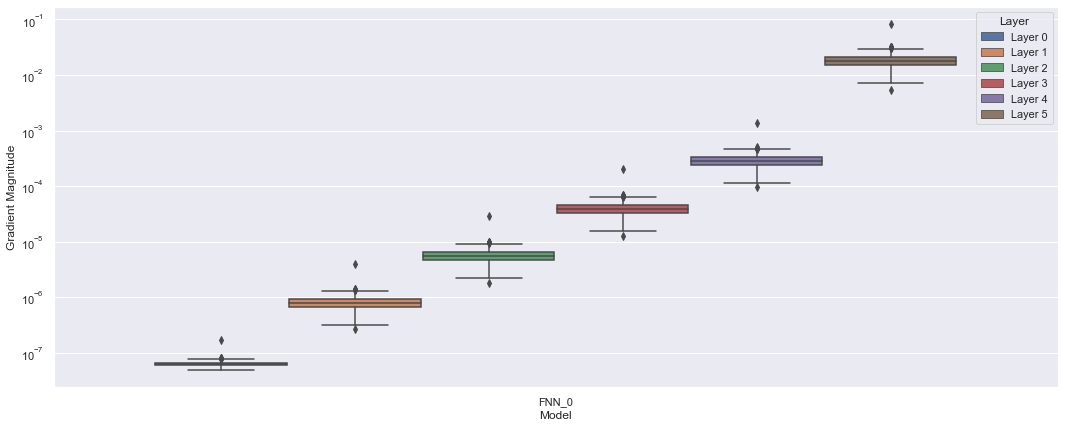

In [13]:
# Set default plotting style.
sns.set()

# Prepare collected gradients for plotting.

gradient_data = pd.DataFrame([
    v for k, v in sorted(gradient.items(), key=lambda _: _[0]) if r'weight' in k
]).transpose().rename(columns=lambda _: f'Layer {_}')
gradient_data = pd.melt(gradient_data, value_vars=gradient_data.columns)
gradient_data[r'Model'] = type(fnn_model).__name__


# Combine all gradients in a single data frame.
gradient_data = gradient_data.rename(
    columns={r'variable': r'Layer', r'value': r'Gradient Magnitude'})

# Define plotting figure and corresponding attributes.
fig, ax = plt.subplots(1, 1, figsize=(18, 7))
ax.set(yscale=r'log')

# Plot pre-processed gradients.
_ = sns.boxplot(x=r'Model', y=r'Gradient Magnitude', hue=r'Layer', data=gradient_data, ax=ax)

As shown by the graph, the gradient does vanish.

<a name="exercise-analyze-gradient-two"></a><div class="alert alert-warning">
    Execute the notebook until here and try to solve the following tasks:
    <ul>
        <li>Assume a vanishing gradient. Apply the countermeasure presented during the accompanying exercise by implementing a corresponding <tt>FNN_1</tt>.</li>
        <li>Create an instance of <tt>FNN_1</tt> as well as of a corresponding <tt>Adam</tt> optimizer with a learning rate of $0.0001$.</li>
        <li>Print the resulting model and verify the architecture by inspecting the output.</li>
        <li>Train an <tt>FNN_1</tt> network for $5$ epochs, print the training accuracy as well as the loss per epoch and report the final test set loss and accuracy.</li>
    </ul>
</div>

In [14]:
class FNN_1 (torch.nn.Module):
    
    def __init__(self):
        super(FNN_1, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, 28 * 28)
        self.ac1 = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(self.fc1.out_features, self.fc1.out_features)
        self.ac2 = torch.nn.ReLU()
        self.fc3 = torch.nn.Linear(self.fc2.out_features, self.fc2.out_features)
        self.ac3 = torch.nn.ReLU()
        self.fc4 = torch.nn.Linear(self.fc3.out_features, self.fc3.out_features)
        self.ac4 = torch.nn.ReLU()
        self.fc5 = torch.nn.Linear(self.fc4.out_features, self.fc4.out_features)
        self.ac5 = torch.nn.ReLU()
        
        self.fc6 = torch.nn.Linear(self.fc5.out_features, 10)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        x = self.ac2(x)
        x = self.fc3(x)
        x = self.ac3(x)
        x = self.fc4(x)
        x = self.ac4(x)
        x = self.fc5(x)
        x = self.ac5(x)
        return self.fc6(x)

In [15]:
# Set random seed for reproducibility.
np.random.seed(seed=42)
torch.manual_seed(seed=42)

# Create FNN_1 instance and the corresponding optimizer to use.
target_device = torch.device(r'cpu')
fnn_model = FNN_1().to(target_device)
optimizer = torch.optim.Adam(fnn_model.parameters(), lr=1e-4)

# Show the architecture of the FNN_1 model.
print(fnn_model)

FNN_1(
  (fc1): Linear(in_features=784, out_features=784, bias=True)
  (ac1): ReLU()
  (fc2): Linear(in_features=784, out_features=784, bias=True)
  (ac2): ReLU()
  (fc3): Linear(in_features=784, out_features=784, bias=True)
  (ac3): ReLU()
  (fc4): Linear(in_features=784, out_features=784, bias=True)
  (ac4): ReLU()
  (fc5): Linear(in_features=784, out_features=784, bias=True)
  (ac5): ReLU()
  (fc6): Linear(in_features=784, out_features=10, bias=True)
)


In [16]:
# Set random seed for reproducibility.
np.random.seed(seed=42)
torch.manual_seed(seed=42)

# Train and evaluate FNN_1 instance on the MNIST training set.
train_and_evaluate(
    model=fnn_model,
    optimizer=optimizer,
    device=target_device,
    num_epochs=5,
    loader_train=loader_mnist_train,
    loader_test=loader_mnist_test)

Epoch: 1 / Loss: 0.0032 / Accuracy: 0.9373
Epoch: 2 / Loss: 0.0016 / Accuracy: 0.9679
Epoch: 3 / Loss: 0.0009 / Accuracy: 0.9820
Epoch: 4 / Loss: 0.0006 / Accuracy: 0.9877
Epoch: 5 / Loss: 0.0009 / Accuracy: 0.9813

Final loss: 0.0020 / Final accuracy: 0.9635


<a name="exercise-analyze-gradient-three"></a><div class="alert alert-warning">
    Execute the notebook until here and try to solve the following tasks:
    <ul>
        <li>Create a <i>fresh</i> instance of <tt>FNN_1</tt> and collect its gradients using the MNIST training set.</li>
        <li>Visualize the gradients of each weight parameter accordingly (include the gradient visualization of <tt>FNN_0</tt>).</li>
        <li>Do the gradients vanish?</li>
    </ul>
</div>

In [17]:
fnn_model = FNN_1()
gradient = collect_gradients(
    model=fnn_model, device=target_device, loader=loader_mnist_train
)

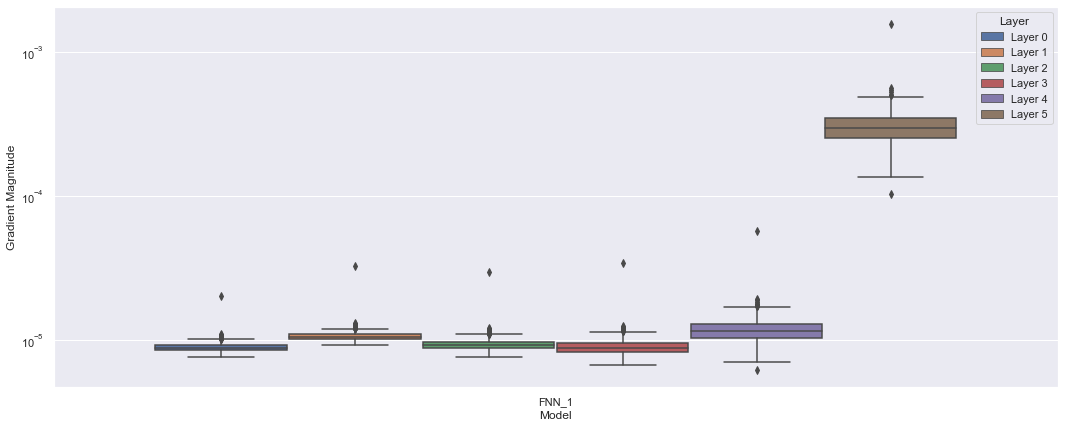

In [18]:
# Set default plotting style.
sns.set()

# Prepare collected gradients for plotting.

gradient_data = pd.DataFrame([
    v for k, v in sorted(gradient.items(), key=lambda _: _[0]) if r'weight' in k
]).transpose().rename(columns=lambda _: f'Layer {_}')
gradient_data = pd.melt(gradient_data, value_vars=gradient_data.columns)
gradient_data[r'Model'] = type(fnn_model).__name__


# Combine all gradients in a single data frame.
gradient_data = gradient_data.rename(
    columns={r'variable': r'Layer', r'value': r'Gradient Magnitude'})

# Define plotting figure and corresponding attributes.
fig, ax = plt.subplots(1, 1, figsize=(18, 7))
ax.set(yscale=r'log')

# Plot pre-processed gradients.
_ = sns.boxplot(x=r'Model', y=r'Gradient Magnitude', hue=r'Layer', data=gradient_data, ax=ax)

As shown by the graph above, diffrence between the gradient magnitude of each layer are much smaller now after applying ReLU activation layers instead of Sigmoid. Also the accuracies after each epoch and the final accuraccy have improved drastecally. Hence, we could say that this technique solved or at least minimized the vanishing gradient problem.

<a name="exercise-derive-derivatives"></a><h2>Deriving Derivatives</h2>
<p>It is already known from the lecture as well as the exercise that <i>activation</i> functions are the primary culprit of the <i>Vanishing Gradient Problem</i>. Hence, it is important to know <i>how</i> the chosen activation functions activate the input and consequently what the <i>derivative</i> is.</p>

<a name="exercise-derive-derivatives-one"></a><div class="alert alert-warning">
    Execute the notebook until here and try to solve the following tasks (hint: have a look at the official <a href="https://pytorch.org/docs/stable/generated/torch.nn.Hardsigmoid.html#torch.nn.Hardsigmoid">PyTorch documentation</a>):
    <ul>
        <li>Implement the <tt>hardsigmoid</tt> activation function as it was done for <tt>relu</tt> in the exercise.</li>
        <li>Implement the <i>derivative</i> of the <tt>hardsigmoid</tt> activation function accordingly.</li>
        <li>Find $3$ different inputs showing the <i>value range</i> of the <tt>hardsigmoid</tt> activation function.</li>
        <li>Plot the <tt>hardsigmoid</tt> activation function indluding its derivative for the input range $[-6; 6]$.</li>
    </ul>
</div>

In [19]:
def hardsigmoid(x: float) -> float:
    """
    Compute the hardsigmoid function.
    
    :param x: the input on which to apply the hardsigmoid function
    :return: the result of the hardsigmoid function applied to its input
    """
    if x <= -3:
        return 0
    elif x >= 3:
        return 1
    else:
        return (x/6)+0.5


def hardsigmoid_d(x: float) -> float:
    """
    Compute the derivate of the hardsigmoid function.
    
    :param x: the input to the hardsigmoid function for computing its derivative
    :return: the derivative of the hardsigmoid function with respect to its input
    """
    if x <= -3:
        return 0
    elif x >= 3:
        return 0
    else:
        return (1/6)


# Crudly check the value range of the sigmoid function and its derivative.
print(f'hardsigmoid(-10): {hardsigmoid(-10.0):.4f} | hardsigmoid\'(-10): {hardsigmoid_d(-10.0):.4f}')
print(f'hardsigmoid(  0): {hardsigmoid(0.0):.4f} | hardsigmoid\'(  0): {hardsigmoid_d(0.0):.4f}')
print(f'hardsigmoid(+10): {hardsigmoid(10.0):.4f} | hardsigmoid\'(+10): {hardsigmoid_d(10.0):.4f}')

hardsigmoid(-10): 0.0000 | hardsigmoid'(-10): 0.0000
hardsigmoid(  0): 0.5000 | hardsigmoid'(  0): 0.1667
hardsigmoid(+10): 1.0000 | hardsigmoid'(+10): 0.0000


In [20]:
def plot_hardsigmoid_with_derivative(x_min: float = -6.0, x_max: float = 6.0, granularity: int = 100) -> None:
    """
    Plot the hardsigmoid function including its derivative.
    
    :param x_min: minimum value of the input value range
    :param x_max: maximum value of the input value range
    :param granularity: granularity controlling the stepsize of the input value range
    :return: None
    """
    data = np.linspace(x_min, x_max, granularity)

    fig, ax = plt.subplots(figsize=(14, 7))
    ax.spines[r'left'].set_position(r'center')
    ax.spines[r'right'].set_color(None)
    ax.spines[r'top'].set_color(None)

    plt.plot(data, tuple(map(hardsigmoid, data)), color=r'#307EC7', linewidth=3, label=r'hardsigmoid')
    plt.plot(data, tuple(map(hardsigmoid_d, data)), color=r'#accbe8', linewidth=3, label=r"hardsigmoid_d'")
    plt.locator_params(axis=r'y', nbins=6)
    plt.title(r'Hard Sigmoid function', fontsize=20)
    plt.legend(prop={'size': 15})
    plt.show()

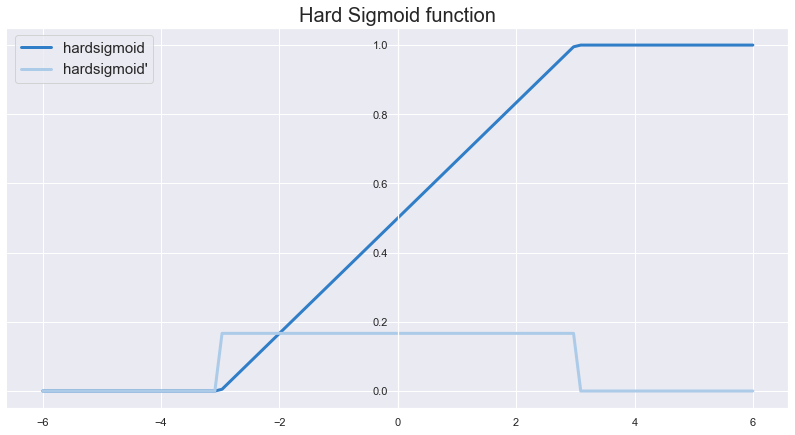

In [21]:
# Set default plotting style.
sns.set()
    
# Plot logistic function including its derivative.
plot_hardsigmoid_with_derivative()

<a name="exercise-derive-derivatives-two"></a><div class="alert alert-warning">
    Execute the notebook until here and try to solve the following tasks (hint: have a look at the official <a href="https://pytorch.org/docs/stable/generated/torch.nn.LeakyReLU.html#torch.nn.LeakyReLU">PyTorch documentation</a>):
    <ul>
        <li>Implement the <tt>leaky_relu</tt> activation function as it was done for <tt>relu</tt> in the exercise. Use a <i>negative slope</i> of $0.37$.</li>
        <li>Implement the <i>derivative</i> of the <tt>leaky_relu</tt> activation function accordingly.</li>
        <li>Find $3$ different inputs showing the <i>value range</i> of the <tt>leaky_relu</tt> activation function.</li>
        <li>Plot the <tt>leaky_relu</tt> activation function indluding its derivative for the input range $[-6; 6]$.</li>
    </ul>
</div>

In [22]:
def leakyReLU(x: float) -> float:
    """
    Compute the leakyReLU function.
    
    :param x: the input on which to apply the leakyReLU function
    :return: the result of the leakyReLU function applied to its input
    """
    return x if x >= 0 else 0.01 * x


def leakyReLU_d(x: float) -> float:
    """
    Compute the derivate of the leakyReLU function.
    
    :param x: the input to the leakyReLU function for computing its derivative
    :return: the derivative of the leakyReLU function with respect to its input
    """
    return 1 if x >= 0 else 0.01


# Crudly check the value range of the sigmoid function and its derivative.
print(f'leakyReLU(-10): {hardsigmoid(-10.0):.4f} | leakyReLU\'(-10): {hardsigmoid_d(-10.0):.4f}')
print(f'leakyReLU(  0): {hardsigmoid(0.0):.4f} | leakyReLU\'(  0): {hardsigmoid_d(0.0):.4f}')
print(f'leakyReLU(+10): {hardsigmoid(10.0):.4f} | leakyReLU\'(+10): {hardsigmoid_d(10.0):.4f}')

leakyReLU(-10): 0.0000 | leakyReLU'(-10): 0.0000
leakyReLU(  0): 0.5000 | leakyReLU'(  0): 0.1667
leakyReLU(+10): 1.0000 | leakyReLU'(+10): 0.0000


In [24]:
def plot_leakyReLU_with_derivative(x_min: float = -6.0, x_max: float = 6.0, granularity: int = 100) -> None:
    """
    Plot the leakyReLU function including its derivative.
    
    :param x_min: minimum value of the input value range
    :param x_max: maximum value of the input value range
    :param granularity: granularity controlling the stepsize of the input value range
    :return: None
    """
    data = np.linspace(x_min, x_max, granularity)

    fig, ax = plt.subplots(figsize=(14, 7))
    ax.spines[r'left'].set_position(r'center')
    ax.spines[r'right'].set_color(None)
    ax.spines[r'top'].set_color(None)

    plt.plot(data, tuple(map(leakyReLU, data)), color=r'#307EC7', linewidth=3, label=r'leakyReLU')
    plt.plot(data, tuple(map(leakyReLU_d, data)), color=r'#accbe8', linewidth=3, label=r"leakyReLU_d'")
    plt.locator_params(axis=r'y', nbins=6)
    plt.title(r'Leaky ReLU function', fontsize=20)
    plt.legend(prop={'size': 15})
    plt.show()

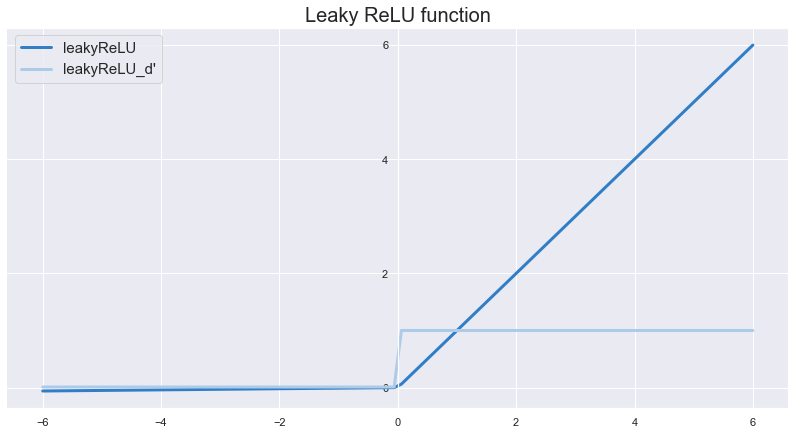

In [25]:
# Set default plotting style.
sns.set()
    
# Plot logistic function including its derivative.
plot_leakyReLU_with_derivative()